# Operation Covid 19

## Operation Covid 19 Global

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_report = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')
covid_india = pd.read_csv('covid_19_india.csv')

confirmed.drop_duplicates(subset = 'Country/Region', keep = 'first', inplace = True)
deaths.drop_duplicates(subset = 'Country/Region', keep = 'first', inplace = True)
recovered.drop_duplicates(subset = 'Country/Region', keep = 'first', inplace = True)

In [3]:
confirmed_cases = int(confirmed[confirmed.columns[-1:]].sum())
recovered_cases = int(recovered[recovered.columns[-1:]].sum())
death_cases = int(deaths[deaths.columns[-1:]].sum())
active_cases = int(confirmed_cases - (recovered_cases - death_cases))

cases = ['confirmed cases','recovered cases','death cases','active cases']
values = [confirmed_cases,recovered_cases,death_cases,active_cases]

### Visualizing total percentage of Confirmed, Recovered, Deaths and Active cases globally.

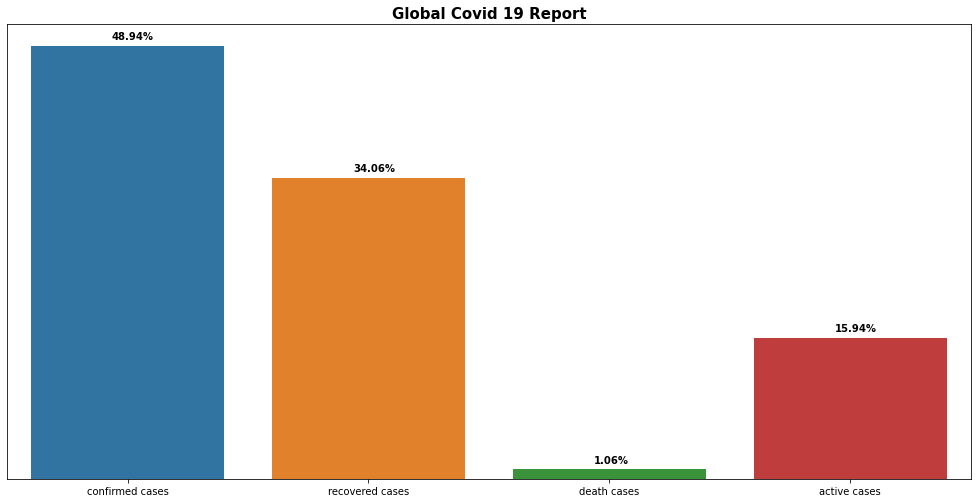

In [4]:
fig, ax = plt.subplots(figsize = (14,7))
ax = sns.barplot(x = cases, y = values)
total = sum(values)
for i, v in enumerate(values):
    ax.text( i - 0.065, v + 2500000 , str(round((v* 100/total),2)) + '%', fontweight='bold')
plt.tight_layout()
ax.set_title('Global Covid 19 Report',fontweight='bold',fontsize = 15)
ax.set(yticklabels=[])
ax.tick_params(left=False)
plt.patches = []

In [5]:
confirmed_new = confirmed[:]
confirmed_new.drop(['Province/State','Lat','Long'],axis = 1, inplace = True)
confirmed_new.set_index('Country/Region', inplace=True)
confirmed_new['Confirmed'] = confirmed_new.sum(axis = 1)
confirmed_df = pd.DataFrame(confirmed_new['Confirmed']).reset_index()
confirmed_df.sort_values('Confirmed', ascending= False)

deaths_new = deaths[:]
deaths_new.drop(['Province/State','Lat','Long'],axis = 1, inplace = True)
deaths_new.set_index('Country/Region', inplace=True)
deaths_new['Deaths'] = deaths_new.sum(axis = 1)
deaths_df = pd.DataFrame(deaths_new['Deaths']).reset_index()
deaths_df.sort_values('Deaths', ascending= False)

recovered_new = recovered[:]
recovered_new.drop(['Province/State','Lat','Long'],axis = 1, inplace = True)
recovered_new.set_index('Country/Region', inplace=True)
recovered_new['Recovered'] = recovered_new.sum(axis = 1)
recoverd_df = pd.DataFrame(recovered_new['Recovered']).reset_index()
recoverd_df.sort_values('Recovered', ascending= False)

df = pd.merge(confirmed_df, recoverd_df, on='Country/Region')
Final_report = pd.merge(df, deaths_df, on='Country/Region')
Final_report["Death Rate"] = np.round(100*Final_report["Deaths"]/Final_report["Confirmed"],2)
Final_report['Active'] = Final_report['Confirmed'] - (Final_report['Deaths']+Final_report['Recovered'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

### World wide Top and Bottom Analysis.

In [6]:
Top_15_report = Final_report.sort_values('Confirmed',ascending = False).head(15)

Top_15_report.style.background_gradient(cmap='Reds',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Recovered"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Reds',subset=["Death Rate"])\
                        .background_gradient(cmap='Reds',subset=["Active"])

,Country/Region,Confirmed,Recovered,Deaths,Death Rate,Active
179,US,6515219551,496971828,131959012,2.030000,5886288711
79,India,3630256570,3278729233,49303994,1.360000,302223343
23,Brazil,2890551240,2522678760,79251623,2.740000,288620857
143,Russia,1001459392,856199699,20064969,2.000000,125194724
163,Spain,700829997,63213903,20187990,2.880000,617428104
85,Italy,695921937,542509955,27772121,3.990000,125639861
178,Turkey,692929270,636347005,7514413,1.080000,49067852
66,Germany,576027306,502929376,14613418,2.540000,58484512
37,Colombia,565228900,515908180,15263782,2.700000,34056938
6,Argentina,559997236,487898893,13249937,2.370000,58848406


In [7]:
Bottom_15_report = Final_report.sort_values('Confirmed',ascending = True).head(15)

Bottom_15_report.style.background_gradient(cmap='Greens',subset=["Confirmed"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Greens',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Death Rate"])\
                        .background_gradient(cmap='Greens',subset=["Active"])

,Country/Region,Confirmed,Recovered,Deaths,Death Rate,Active
91,Kiribati,49,0,0,0.000000,49
116,Micronesia,143,135,0,0.000000,8
186,Vanuatu,462,294,53,11.470000,115
148,Samoa,523,402,0,0.000000,121
112,Marshall Islands,860,788,0,0.000000,72
105,MS Zaandam,3950,1344,876,22.180000,1730
159,Solomon Islands,4098,2853,0,0.000000,1245
183,United Kingdom,8365,6891,0,0.000000,1474
75,Holy See,8830,5611,0,0.000000,3219
145,Saint Kitts and Nevis,12382,10921,0,0.000000,1461


## Operation Covid 19 India.

In [8]:
Final_report.set_index('Country/Region', inplace=True)
confirmed_cases = Final_report.loc['India','Confirmed']
recovered_cases = Final_report.loc['India','Recovered']
death_cases = Final_report.loc['India','Deaths']
active_cases = Final_report.loc['India','Active']

cases = ['Confirmed cases','Recovered cases','Death cases','Active cases']
values = [confirmed_cases,recovered_cases,death_cases,active_cases]

### Visualizing total percentage of Confirmed, Recovered, Deaths and Active cases in India.

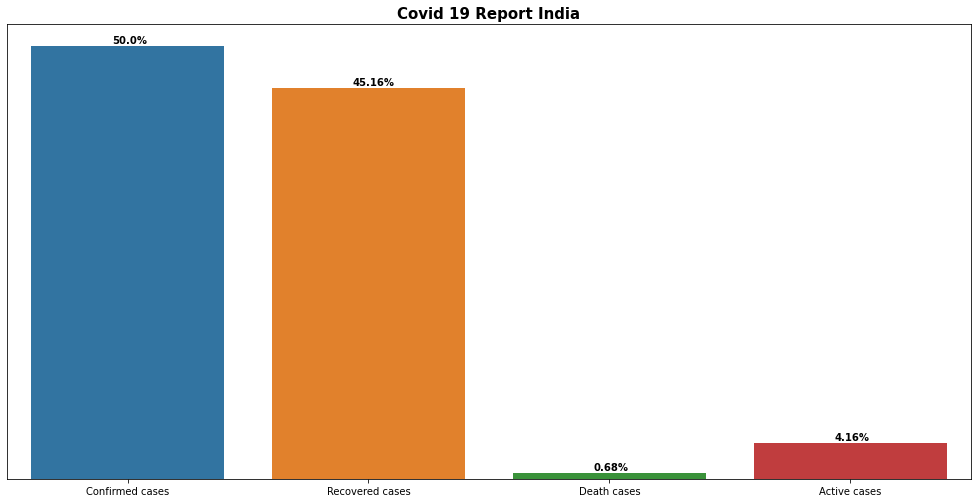

In [9]:
fig, ax = plt.subplots(figsize = (14,7))
ax = sns.barplot(x = cases, y = values)
total = sum(values)
for i, v in enumerate(values):
    ax.text( i - 0.065, v + 25000000 , str(round((v* 100/total),2)) + '%', fontweight='bold')
plt.tight_layout()
ax.set_title('Covid 19 Report India',fontweight='bold',fontsize = 15)
ax.set(yticklabels=[])
ax.tick_params(left=False)
plt.patches = []

In [71]:
df1 = confirmed.groupby('Country/Region').sum().reset_index()

dates = list(confirmed.columns[349:])
dates_india = list(pd.to_datetime(dates))
#dates_india = dates[8:]

countries = ['China','US', 'Brazil','India','Spain','Japan']

global_confirmed = []

for country in countries:
    k = df1[df1['Country/Region'] == country].loc[:,'1/1/21':]
    global_confirmed.append(k.values.tolist()[0]) 

### Comparision with other countries by plotting Line graph

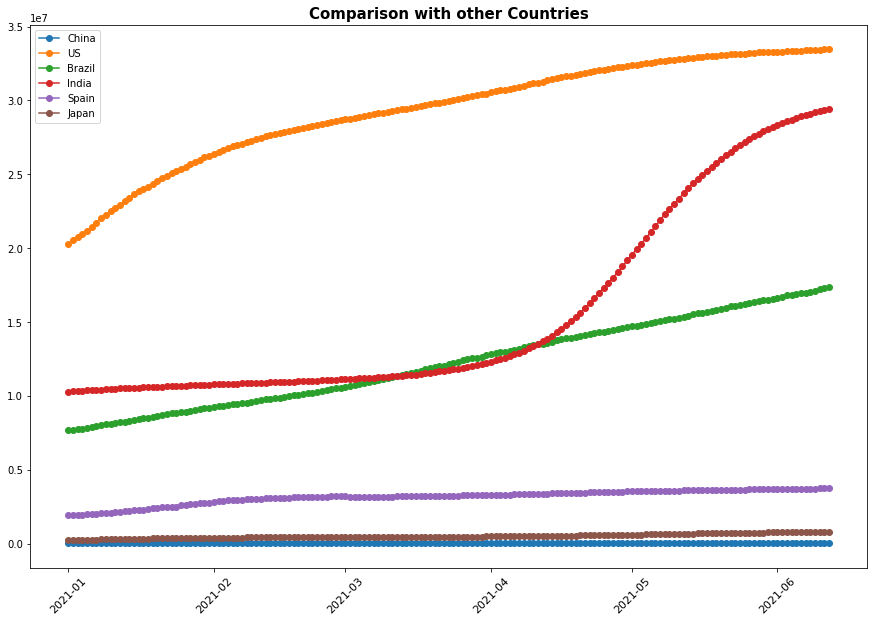

In [94]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 45 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.title("Comparison with other Countries" , fontsize = 15,weight='bold')
    
for i in range(len(countries)):
    plt.plot_date(y= global_confirmed[i],x= dates_india,label = countries[i],linestyle ='-')
plt.legend();

### Visualizing confiremed ,Recovered and Death cases in india using Line graph

In [92]:
dates = list(confirmed.columns[341:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

df1 = confirmed.groupby('Country/Region').sum().reset_index()
df3 = recovered.groupby('Country/Region').sum().reset_index()

k = df1[df1['Country/Region']=='India'].loc[:,'1/1/21':]
india_confirmed = k.values.tolist()[0] 


j = df3[df3['Country/Region']=='India'].loc[:,'1/1/21':]
india_recovered = j.values.tolist()[0]

Text(0, 100, 'Covid 19 second wave')

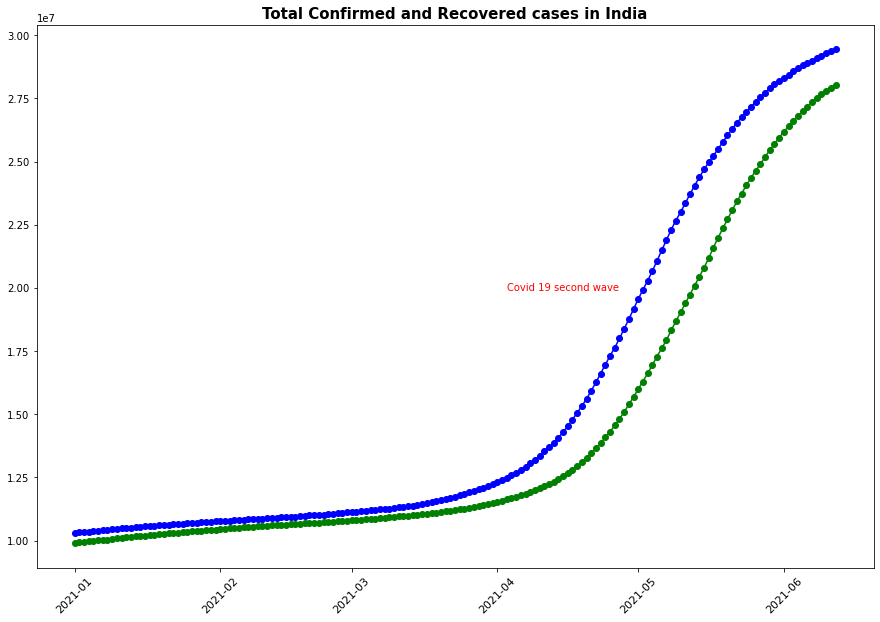

In [93]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 45 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.title("Total Confirmed and Recovered cases in India" , fontsize = 15,weight='bold')

ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle ='-',color = 'g')

plt.annotate('Covid 19 second wave',
            xy=(dates[112], india_confirmed[110]), #annotate the 50th data point; you could select this in a better way
            xycoords='data', #the xy we passed refers to the data
            xytext=(0, 100), #where we put the text relative to the xy
            textcoords='offset points', #what the xytext coordinates mean
            color = 'red',
            #arrowprops=dict(arrowstyle="->"), #style of the arrow
            ha='center')

In [15]:
dates = list(confirmed.columns[341:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

df2 = deaths.groupby('Country/Region').sum().reset_index()
i = df2[df2['Country/Region']=='India'].loc[:,'1/1/21':]
india_deaths = i.values.tolist()[0]

Text(0, 100, 'Covid 19 second wave')

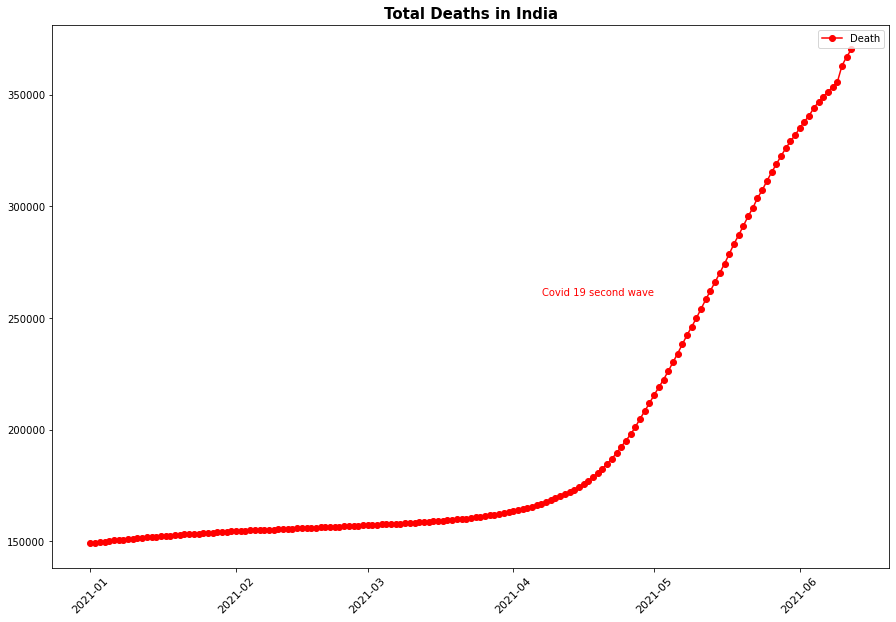

In [90]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 45 ,fontsize = 11)
plt.yticks(fontsize = 10)

plt.title("Total Deaths in India" , fontsize = 15,weight='bold')
ax3 = plt.plot_date(y= india_deaths,x= dates_india,label = 'Death',linestyle ='-',color = 'r')
plt.legend()

plt.annotate('Covid 19 second wave',
            xy=(dates_india[108], india_deaths[120]), #annotate the 50th data point; you could select this in a better way
            xycoords='data', #the xy we passed refers to the data
            xytext=(0, 100), #where we put the text relative to the xy
            textcoords='offset points', #what the xytext coordinates mean
            color = 'red',
            #arrowprops=dict(arrowstyle="->"), #style of the arrow
            ha='center')

### Statewise Covid 19 Report

In [17]:
state_cases = covid_india.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()

state_cases['Active'] = (state_cases['Confirmed'] - (state_cases['Deaths']+state_cases['Cured']))
state_cases["Death Rate (per 100)"] = round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases = state_cases.astype({'Deaths': 'int'})
state_cases = state_cases.astype({'Confirmed': 'int'})
state_cases = state_cases.astype({'Active': 'int'})
state_cases = state_cases.astype({'Cured': 'int'})

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [18]:
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Blues',subset=["Cured"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Blues',subset=["Death Rate (per 100)"])

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100)
22,Maharashtra,5433506,83777,4927480,422249,1.540000
17,Karnataka,2272374,22838,1674487,575049,1.010000
18,Kerala,2200706,6612,1846105,347989,0.300000
32,Tamil Nadu,1664350,18369,1403052,242929,1.100000
37,Uttar Pradesh,1637663,18072,1483249,136342,1.100000
1,Andhra Pradesh,1475372,9580,1254291,211501,0.650000
10,Delhi,1402873,22111,1329899,50863,1.580000
39,West Bengal,1171861,13576,1026492,131793,1.160000
7,Chhattisgarh,925531,12036,823113,90382,1.300000
30,Rajasthan,879664,7080,713129,159455,0.800000


In [48]:
all_state = list(covid_india['State/UnionTerritory'].unique())
all_state.remove('Unassigned')
all_state.remove(np.nan)
all_state.remove('Nagaland')

latest = covid_india[covid_india['Date'] > '2021-04-01']
latest['Active'] = latest['Confirmed'] - (latest['Deaths']- latest['Cured'])

state_cases = latest.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
state_cases = state_cases.sort_values('Confirmed', ascending= False).fillna(0)
states =list(state_cases['State/UnionTerritory'][0:15])

states_confirmed = {}
states_deaths = {}
states_recovered = {}
states_active = {}
states_dates = {}

for state in states:
    df = latest[latest['State/UnionTerritory'] == state].reset_index()
    k = []
    l = []
    m = []
    n = []
    for i in range(1,len(df)):
        k.append(df['Confirmed'][i]-df['Confirmed'][i-1])
        l.append(df['Deaths'][i]-df['Deaths'][i-1])
        m.append(df['Cured'][i]-df['Cured'][i-1])
        n.append(df['Active'][i]-df['Active'][i-1])
    states_confirmed[state] = k
    states_deaths[state] = l
    states_recovered[state] = m
    states_active[state] = n
    date = list(df['Date'])
    date = list(pd.to_datetime(date))
    states_dates[state] = date[1:]
    

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


### Visualizing Top 15 States Confirmed and Death cases.

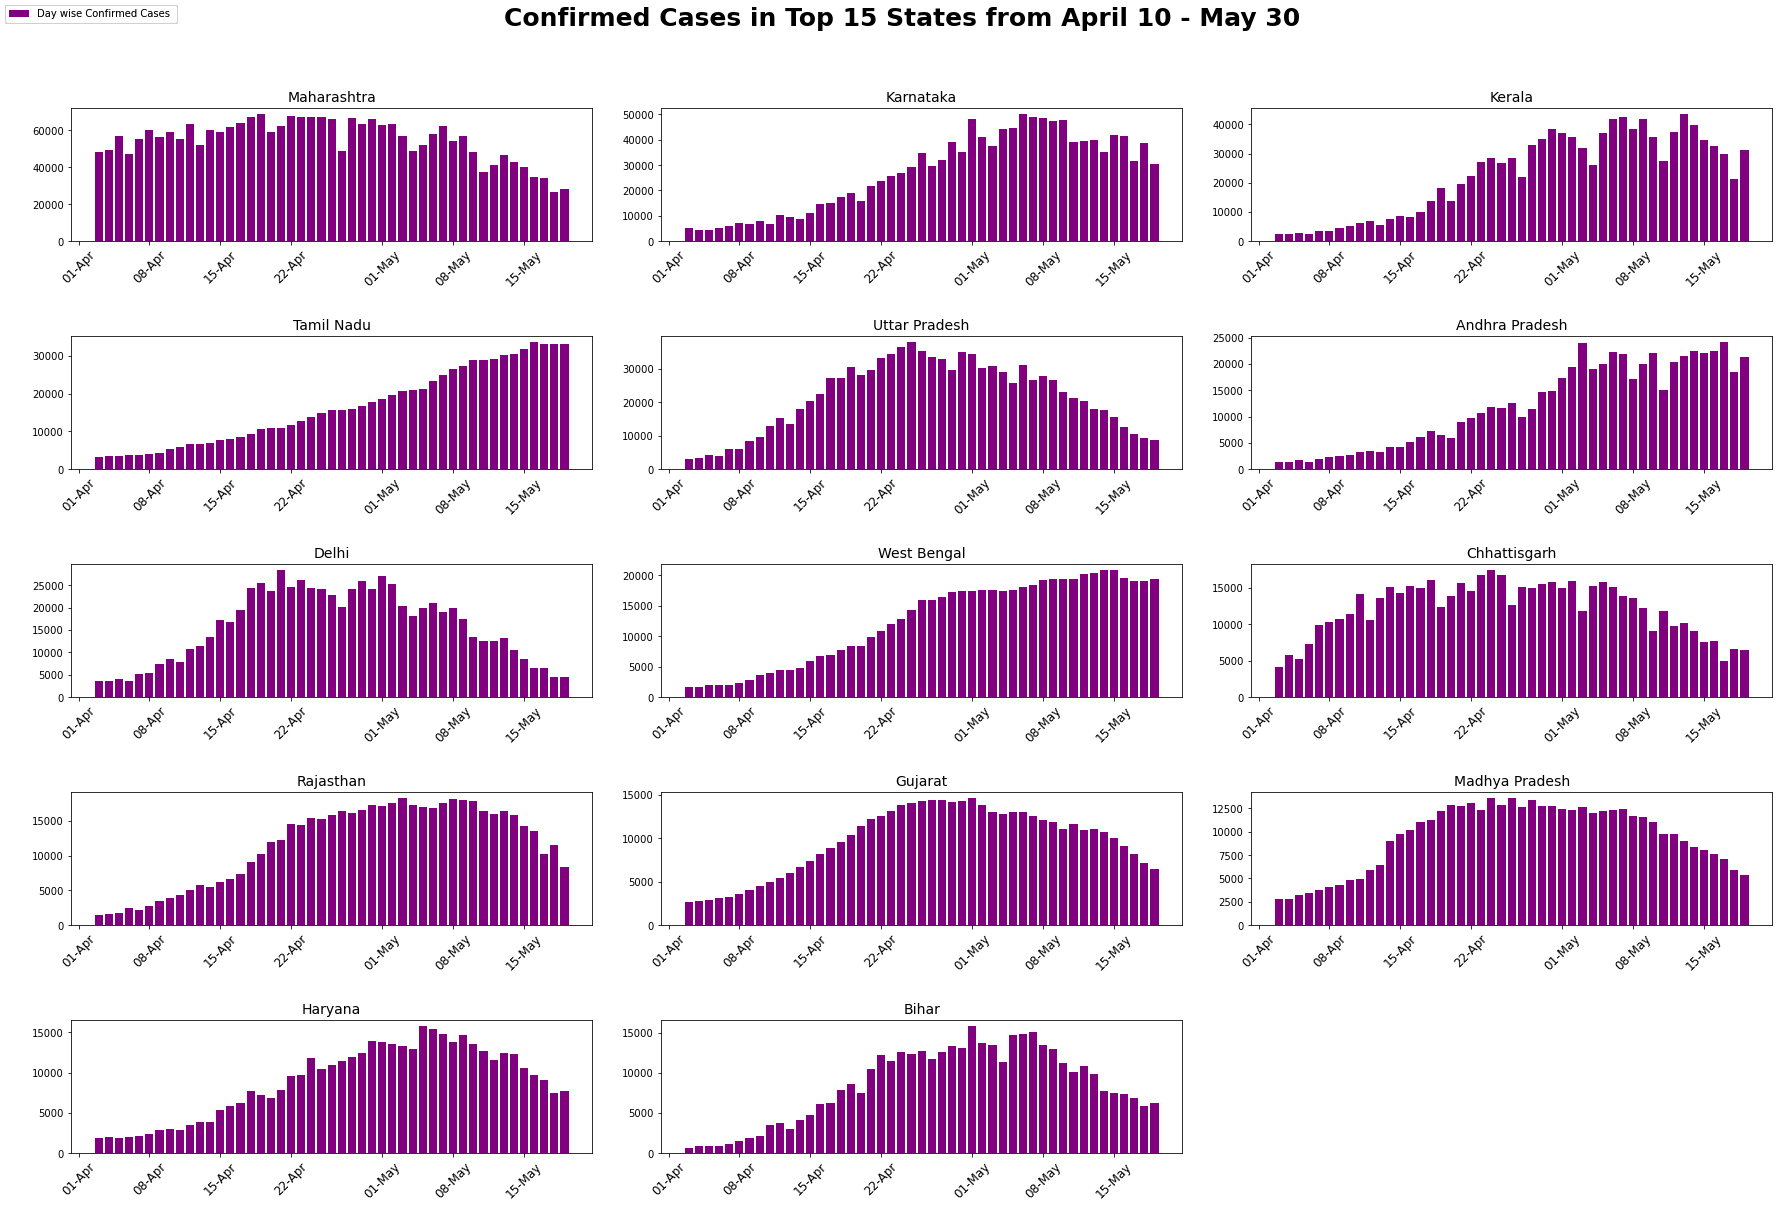

In [84]:
fig = plt.figure(figsize= (25,17))
plt.suptitle('Confirmed Cases in Top 15 States from April 10 - May 30',fontsize = 25,y=1.0,weight='bold')
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    
    ax.bar(states_dates[states[k]],list(states_confirmed[states[k]]),label = 'Day wise Confirmed Cases ',color='purple') 
    plt.title(states[k],fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.xticks(rotation = 45,fontsize = 12)
    
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)

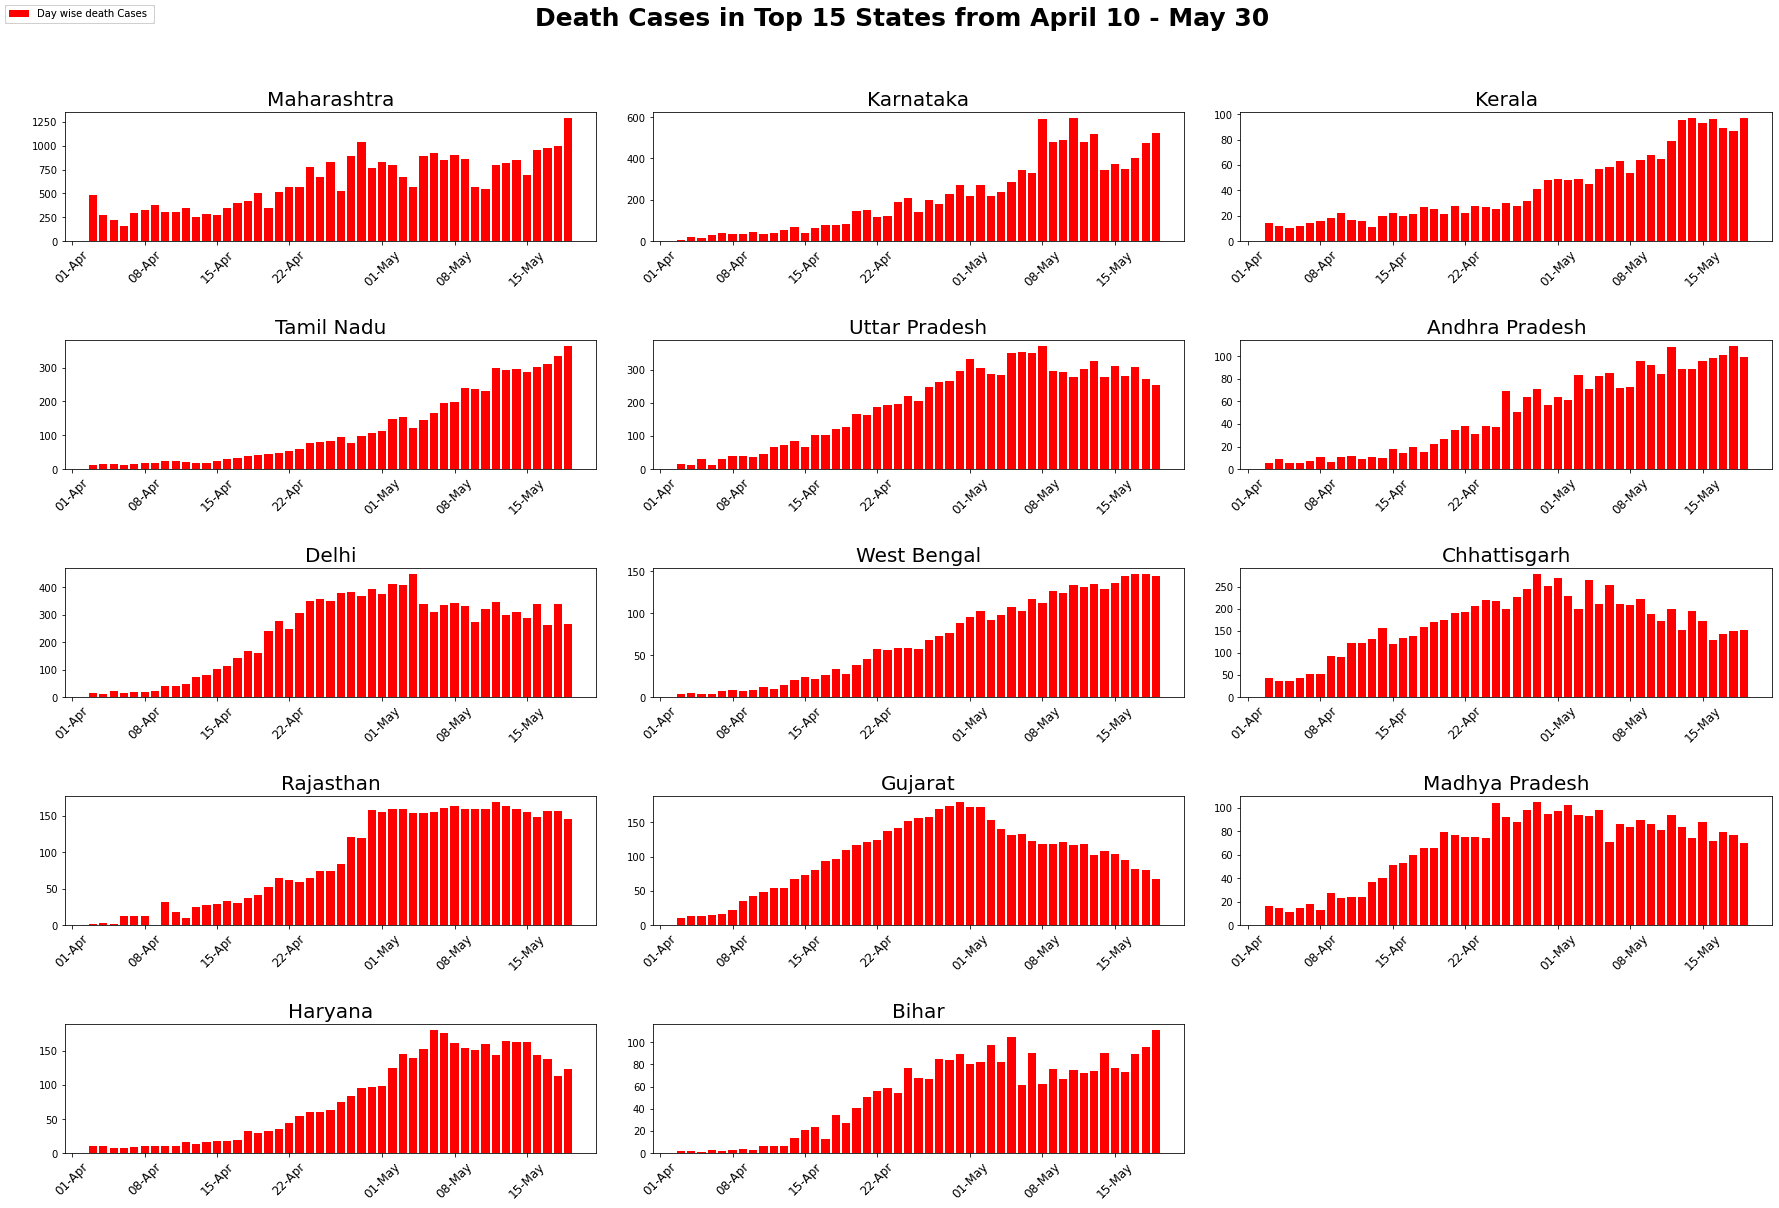

In [85]:
fig = plt.figure(figsize= (25,17))
plt.suptitle('Death Cases in Top 15 States from April 10 - May 30',fontsize = 25,y=1.0,weight='bold')
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    
    ax.bar(states_dates[states[k]],states_deaths[states[k]],label = 'Day wise death Cases ', color='red')
    plt.title(states[k],fontsize = 20)
    plt.xticks(rotation = 45,fontsize = 12)
    
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)

In [23]:
def calc_growthRate(values):
    k = []
    for i in range(1,len(values)):
        summ = 0
        for j in range(i):
            summ = summ + values[j]
        rate = (values[i]/summ)*100
        k.append(int(rate))
    return k

### Visualizing Top 15 States Growth rate and Death rate.

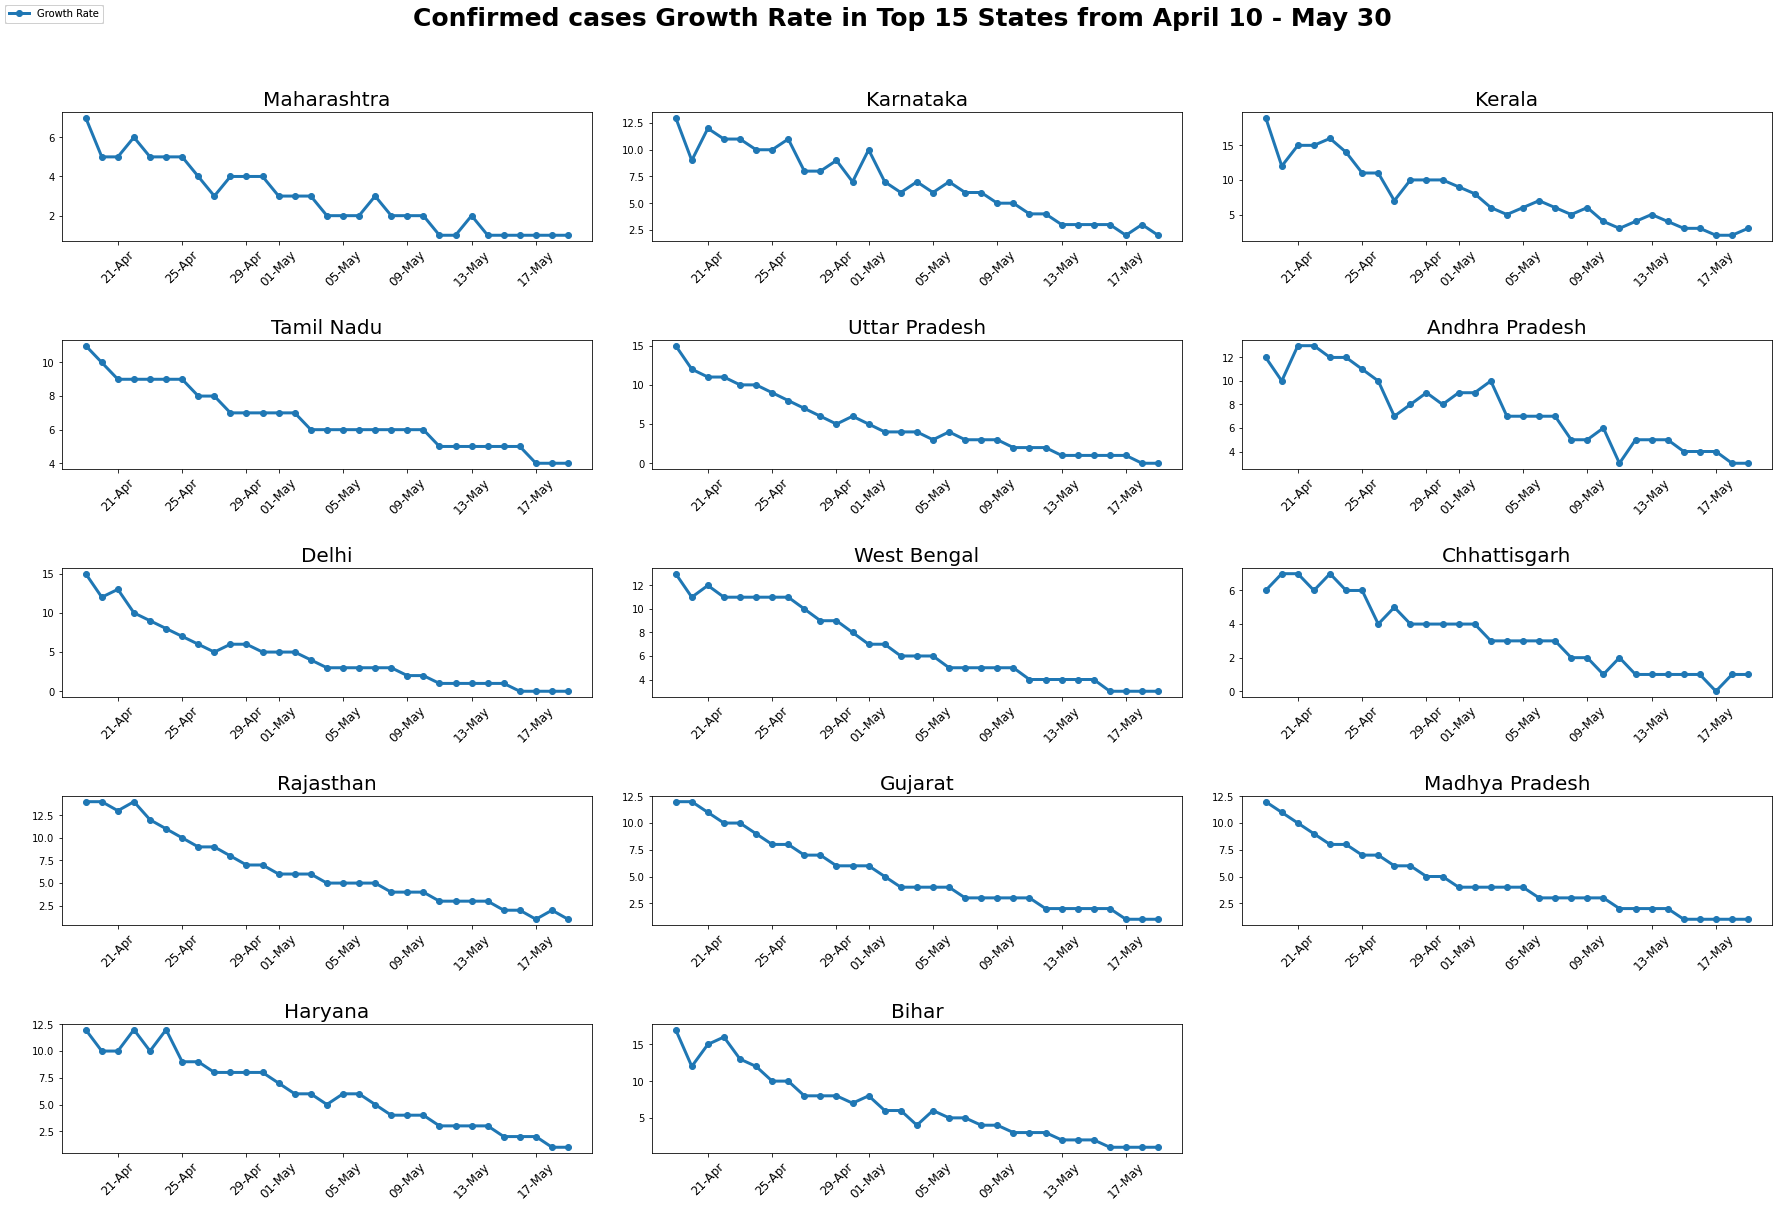

In [86]:
fig = plt.figure(figsize= (25,17))
plt.suptitle('Confirmed cases Growth Rate in Top 15 States from April 10 - May 30',fontsize = 25,y=1.0,weight='bold')
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    
    growth_rate = calc_growthRate(states_confirmed[states[k]])
    ax.plot_date(states_dates[states[k]][16:],growth_rate[15:],label = 'Growth Rate',linewidth =3,linestyle='-') 
    plt.title(states[k],fontsize = 20)
    plt.xticks(rotation = 45,fontsize = 12)
    
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)

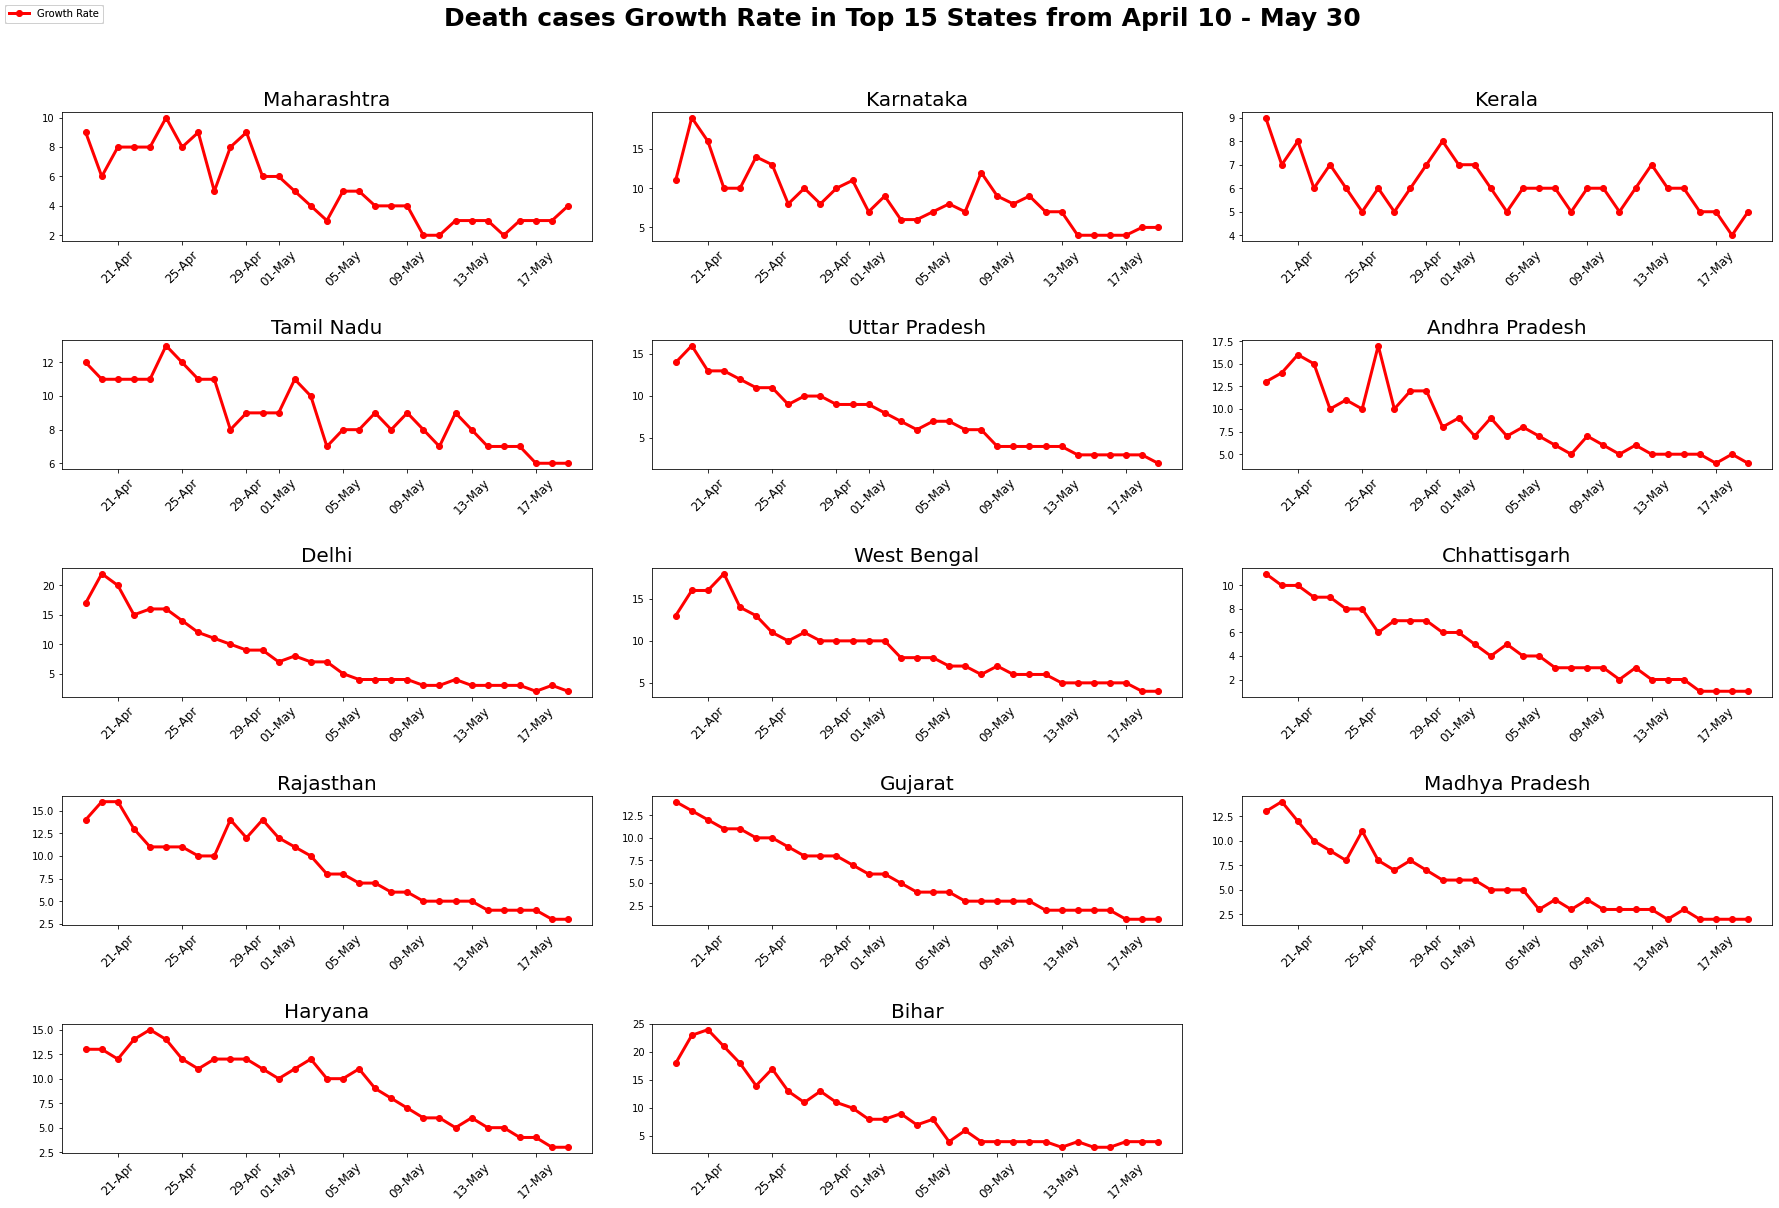

In [87]:
fig = plt.figure(figsize= (25,17))
plt.suptitle('Death cases Growth Rate in Top 15 States from April 10 - May 30',fontsize = 25,y=1.0,weight='bold')
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    
    growth_rate = calc_growthRate(states_deaths[states[k]])
    ax.plot_date(states_dates[states[k]][16:],growth_rate[15:],color = 'red',label = 'Growth Rate',linewidth =3,linestyle='-')  
    plt.title(states[k],fontsize = 20)
    plt.xticks(rotation = 45,fontsize = 12)

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)